# Práctica 4 - Competición de Kaggle  
Grupo J: Lucía Pazos Santiago, Anxo Trillo Santamaría, Javier Ares Vila

En primer lugar, se importarán las librerías necesarias para el desarrollo de esta práctica. Si no están ya instaladas, será necesario instalarlas para poder usarlas.

In [7]:
%pip install scikit-learn
%pip install imbalanced-learn
%pip install pandas
%pip install matplotlib
%pip install tqdm
%pip install xgboost
%pip install lightgbm
%pip install catboost --prefer-binary
%pip install tensorflow
%pip install keras
%pip install scikeras
%pip install torch
%pip install pytorch-tabnet


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached pytorch_tabnet-4.1.0-py3-none-any.whl.metadata (15 kB)
Using cached pytorch_tabnet-4.1.0-py3-none-any.whl (44 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import imblearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import *
from sklearn.decomposition import *
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.metrics import *
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from tqdm import tqdm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import torch

## Introducción

En esta práctica desarrollaremos un modelo predictivo que permita estimar el precio de viviendas en Galicia a partir de diferentes características disponibles en un conjunto de datos proporcionados por una competición de Kaggle (https://www.kaggle.com/competitions/predicion-do-prezo-de-vivendas/overview). 

Para ello, llevaremos a cabo un análisis de los datos con el fin de entender su estructura y encontrar posibles problemas. A continuación, aplicaremos técnicas de preprocesamiento, seleccionaremos y entrenaremos distintos modelos y ajustaremos sus hiperparámetros. Por último generaremos predicciones sobre el conjunto de test, las cuales serán enviadas a Kaggle, buscando maximizar la precisión.

## Descripción de los datos

En esta sección se describen las principales características del conjunto de datos. Para ello, se carga el dataset de entrenamiento desde un archivo CSV y se muestra mediante display(df1). Como se puede observar, el dataset está compuesto por 20000 muestras y 20 columnas, entre las cuales se encuentran tanto variables numeréricas como categóricas. 

Cabe destacar que a simple vista ya se puede observar como algunas columnas presentan valores NaN.

In [14]:
df1 = pd.read_csv('./data/train.csv', delimiter=',')
display(df1)

,id,superficie_interior_m2,superficie_exterior_m2,numero_habitacions,numero_banos,ano_construccion,lonxitude,latitude,temperatura_media_mes_construccion,tipo_edificacion,calidade_materiais,cor_favorita_propietario,distancia_centro_km,distancia_escola_km,indice_criminalidade,acceso_transporte_publico,orientacion,eficiencia_enerxetica,numero_arboles_xardin,prezo_euros
0,25521,44.96,0.00,1,2,1947,-8.17,43.20,24.75,Apartamento,Media,Azul,23.68,2.75,0.35,Bo,Norte,C,0,51938
1,4843,93.55,87.26,2,2,1977,-7.23,43.60,14.06,Apartamento,Alta,Verde,NaN,16.67,0.44,Bo,Este,C,0,76891
2,27734,273.64,187.29,1,1,1996,-8.40,42.25,12.27,Chalet adosado,Media,Branco,29.44,18.96,0.47,Regular,Este,C,10,261441
3,22142,171.82,54.89,4,2,1996,-6.81,43.15,11.61,Chalet adosado,Alta,Vermello,53.31,1.96,0.35,Bo,Este,G,3,247821
4,14748,NaN,2153.49,1,1,1990,-8.76,42.92,10.04,Casa,Baixa,Verde,70.20,4.72,0.09,Bo,Oeste,G,12,400645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29803,122.77,2285.95,6,2,2003,-8.34,43.63,5.74,Casa,Alta,Branco,65.57,12.38,0.69,Bo,Oeste,C,0,443729
19996,5391,62.59,33.16,2,2,1970,-6.77,42.62,14.61,Apartamento,Media,Amarelo,21.46,21.57,0.15,Bo,Norte,C,0,50000
19997,861,144.47,427.37,4,1,1988,-6.87,42.00,14.74,Casa,Media,Vermello,NaN,0.72,NaN,Regular,Este,B,6,223467
19998,15796,139.52,0.00,6,2,2014,-7.21,43.38,18.15,Apartamento,Alta,Azul,15.45,14.61,0.28,Bo,Oeste,B,0,186403


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  20000 non-null  int64  
 1   superficie_interior_m2              18993 non-null  float64
 2   superficie_exterior_m2              18973 non-null  float64
 3   numero_habitacions                  20000 non-null  int64  
 4   numero_banos                        20000 non-null  int64  
 5   ano_construccion                    20000 non-null  int64  
 6   lonxitude                           20000 non-null  float64
 7   latitude                            20000 non-null  float64
 8   temperatura_media_mes_construccion  20000 non-null  float64
 9   tipo_edificacion                    20000 non-null  object 
 10  calidade_materiais                  20000 non-null  object 
 11  cor_favorita_propietario            20000

## Preprocesado

A continuación, se muestra el preprocesado del conjunto de datos realizado con el objetivo de prepararlo para la creación del modelo, asegurando así que aprenda de una forma más eficiente y precisa.

El preprocesado de los mejores modelos obtenidos siguió los siguientes pasos:
- En primer lugar, tras cargar el dataset se separó la variable objetivo prezo_euros y se eliminó la columna id, ya que no aporta información útil para la predicción.
- Después, se codificaron las variables de tipo string en formato numérico, para poder utilizar su información en los modelos. La columna eficiencia_enerxetica fue transformada con Label Encoding, debido a que esta columna tenía un orden que fue respetado al transformarla. El resto de columnas (tipo_edificacion, calidade_materiais, cor_favorita_propietario, acceso_transporte_publico y orientacion) se transformaron mediante One-Hot, ya que carecían de orden originalmente.
- Más tarde, las columnas numéricas que contenían valores NaN fueron rellenadas utilizando la mediana de cada columna
- Tras ello, se utilizó StandardScaler para normalizar los datos, ajustándose sobre los datos de entrenamiento y luego aplicándose tanto al conjunto de entrenamiento como al de test.

Sin embargo, antes de llegar a esta combinación, se probaron otras posibilidades que también reflejamos.

### Valores duplicados

Para encontrar los valores duplicados utilizaremos la función drop_duplicates() con una configuración que permite eliminar filas duplicadas manteniendo solo la primera fila del conjunto de duplicados devolviendo un nuevo dataset.

In [53]:
# Eliminar filas duplicadas
df2 =df1.drop_duplicates(subset=None, keep='first', inplace=False)
print(len(df1))
print(len(df2))

20000
20000


Como vemos, no existen filas duplicadas, por lo que ya no hará falta realizar esta operación.

### Gestión de atributos categóricos

Para tratar con las variables string, en primer lugar se probó a eliminarlas del dataset y utilizar solo las columnas numéricas. Para ello se empleó este código:

In [54]:
# Eliminar filas con valores string
for elm in df2:
    if(isinstance(df2[elm].iloc[1],str)):
        #print(elm)
        df2=df2.drop(elm,axis=1)

df2 = df2.reset_index(drop=True)
display(df2)

,id,superficie_interior_m2,superficie_exterior_m2,numero_habitacions,numero_banos,ano_construccion,lonxitude,latitude,temperatura_media_mes_construccion,distancia_centro_km,distancia_escola_km,indice_criminalidade,numero_arboles_xardin,prezo_euros
0,25521,44.96,0.00,1,2,1947,-8.17,43.20,24.75,23.68,2.75,0.35,0,51938
1,4843,93.55,87.26,2,2,1977,-7.23,43.60,14.06,16.98,16.67,0.44,0,76891
2,27734,273.64,187.29,1,1,1996,-8.40,42.25,12.27,29.44,18.96,0.47,10,261441
3,22142,171.82,54.89,4,2,1996,-6.81,43.15,11.61,53.31,1.96,0.35,3,247821
4,14748,125.68,2153.49,1,1,1990,-8.76,42.92,10.04,70.20,4.72,0.09,12,400645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29803,122.77,2285.95,6,2,2003,-8.34,43.63,5.74,65.57,12.38,0.69,0,443729
19996,5391,62.59,33.16,2,2,1970,-6.77,42.62,14.61,21.46,21.57,0.15,0,50000
19997,861,144.47,427.37,4,1,1988,-6.87,42.00,14.74,16.98,0.72,0.33,6,223467
19998,15796,139.52,0.00,6,2,2014,-7.21,43.38,18.15,15.45,14.61,0.28,0,186403


Después, se probó a incluir estas columnas categóricas, que resultó en un mejor rendimiento. La columna eficiencia_enerxetica fue transformada con Label Encoding, debido a que esta columna tenía un orden que fue respetado al transformarla. El resto de columnas (tipo_edificacion, calidade_materiais, cor_favorita_propietario, acceso_transporte_publico y orientacion) se transformaron mediante One-Hot, ya que carecían de orden originalmente.

En el código se muestra también la eliminación de la columna id y la separación de la variable objetivo, operaciones que también son clave en el preprocesado

In [55]:
X_preprocesado = df1.copy()

X_preprocesado = X_preprocesado.drop(columns=['id']) #Eliminamos la columna id, ya que no tiene información relevante

y = X_preprocesado['prezo_euros'] #Separamos el target
X_preprocesado = X_preprocesado.drop(columns=['prezo_euros'])

le = LabelEncoder() #Label Encoding para eficiencia_enerxetica
X_preprocesado['eficiencia_enerxetica'] = le.fit_transform(X_preprocesado['eficiencia_enerxetica'])

#One-Hot Encoding para las otras columnas de texto
X_preprocesado = pd.get_dummies(X_preprocesado, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

display(X_preprocesado)

,superficie_interior_m2,superficie_exterior_m2,numero_habitacions,numero_banos,ano_construccion,lonxitude,latitude,temperatura_media_mes_construccion,distancia_centro_km,distancia_escola_km,...,cor_favorita_propietario_Negro,cor_favorita_propietario_Verde,cor_favorita_propietario_Vermello,acceso_transporte_publico_Bo,acceso_transporte_publico_Malo,acceso_transporte_publico_Regular,orientacion_Este,orientacion_Norte,orientacion_Oeste,orientacion_Sur
0,44.96,0.00,1,2,1947,-8.17,43.20,24.75,23.68,2.75,...,False,False,False,True,False,False,False,True,False,False
1,93.55,87.26,2,2,1977,-7.23,43.60,14.06,16.98,16.67,...,False,True,False,True,False,False,True,False,False,False
2,273.64,187.29,1,1,1996,-8.40,42.25,12.27,29.44,18.96,...,False,False,False,False,False,True,True,False,False,False
3,171.82,54.89,4,2,1996,-6.81,43.15,11.61,53.31,1.96,...,False,False,True,True,False,False,True,False,False,False
4,125.68,2153.49,1,1,1990,-8.76,42.92,10.04,70.20,4.72,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,122.77,2285.95,6,2,2003,-8.34,43.63,5.74,65.57,12.38,...,False,False,False,True,False,False,False,False,True,False
19996,62.59,33.16,2,2,1970,-6.77,42.62,14.61,21.46,21.57,...,False,False,False,True,False,False,False,True,False,False
19997,144.47,427.37,4,1,1988,-6.87,42.00,14.74,16.98,0.72,...,False,False,True,False,False,True,True,False,False,False
19998,139.52,0.00,6,2,2014,-7.21,43.38,18.15,15.45,14.61,...,False,False,False,True,False,False,False,False,True,False


### Valores faltantes

Como se comprobó en el apartado anterior al analizar el dataset, varias columnas contienen valores nulos. Más especificamente superficie_interior_m2, superficie_exterior_m2, distancia_centro_km, distancia_escola_km e indice_criminalidade, por lo que será necesario gestionarlos.

Se han probado varias opciones como eliminar directamente las filas con valores nulos o sustituir los nulos por el valor de la media de la columna, pero se ha observado que los mejores resultados han sido obtenidos sustituyendo los valores faltantes por la mediana.

También se probó a utilizar modelos predictivos para rellenar los datos faltantes mediante IterativeImputer de scikit-learn, sin que produjese mejoras

In [56]:
#X_preprocesado = X_preprocesado.dropna() # Opción de eliminar filas con valores NaN

#X_preprocesado = X_preprocesado.fillna(X_preprocesado.mean(numeric_only=True)) # Opción de rellenar NaN con la media de la columna

#imputer = IterativeImputer(random_state=42) #Opción de utilizar IterativeImputer
#X_preprocesado = imputer.fit_transform(X_preprocesado)

X_preprocesado = X_preprocesado.fillna(X_preprocesado.median(numeric_only=True))
display(X_preprocesado)
X_preprocesado.info()

,superficie_interior_m2,superficie_exterior_m2,numero_habitacions,numero_banos,ano_construccion,lonxitude,latitude,temperatura_media_mes_construccion,distancia_centro_km,distancia_escola_km,...,cor_favorita_propietario_Negro,cor_favorita_propietario_Verde,cor_favorita_propietario_Vermello,acceso_transporte_publico_Bo,acceso_transporte_publico_Malo,acceso_transporte_publico_Regular,orientacion_Este,orientacion_Norte,orientacion_Oeste,orientacion_Sur
0,44.96,0.00,1,2,1947,-8.17,43.20,24.75,23.68,2.75,...,False,False,False,True,False,False,False,True,False,False
1,93.55,87.26,2,2,1977,-7.23,43.60,14.06,16.98,16.67,...,False,True,False,True,False,False,True,False,False,False
2,273.64,187.29,1,1,1996,-8.40,42.25,12.27,29.44,18.96,...,False,False,False,False,False,True,True,False,False,False
3,171.82,54.89,4,2,1996,-6.81,43.15,11.61,53.31,1.96,...,False,False,True,True,False,False,True,False,False,False
4,125.68,2153.49,1,1,1990,-8.76,42.92,10.04,70.20,4.72,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,122.77,2285.95,6,2,2003,-8.34,43.63,5.74,65.57,12.38,...,False,False,False,True,False,False,False,False,True,False
19996,62.59,33.16,2,2,1970,-6.77,42.62,14.61,21.46,21.57,...,False,False,False,True,False,False,False,True,False,False
19997,144.47,427.37,4,1,1988,-6.87,42.00,14.74,16.98,0.72,...,False,False,True,False,False,True,True,False,False,False
19998,139.52,0.00,6,2,2014,-7.21,43.38,18.15,15.45,14.61,...,False,False,False,True,False,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   superficie_interior_m2              20000 non-null  float64
 1   superficie_exterior_m2              20000 non-null  float64
 2   numero_habitacions                  20000 non-null  int64  
 3   numero_banos                        20000 non-null  int64  
 4   ano_construccion                    20000 non-null  int64  
 5   lonxitude                           20000 non-null  float64
 6   latitude                            20000 non-null  float64
 7   temperatura_media_mes_construccion  20000 non-null  float64
 8   distancia_centro_km                 20000 non-null  float64
 9   distancia_escola_km                 20000 non-null  float64
 10  indice_criminalidade                20000 non-null  float64
 11  eficiencia_enerxetica               20000

### Eliminación de columnas

Para intentar prescindir de información irrelevante que empeore el rendimiento del modelo, se utilizó SelectKBest para seleccionar las características más importantes y que más influencia tienen en el cálculo de la variable objetivo. Sin embargo, cuando se probó a validarlo sobre el test interno, obtuvo un rendimiento peor que su no utilización, por lo que fue descartado

In [57]:
# Aplicar SelectKBest para seleccionar características relevantes
ncomponentes=4 #se cambia aqui la cantidad de componentes a la que se puede reducir
selector = SelectKBest(score_func=f_regression, k=ncomponentes)
dfreducido=selector.fit_transform(X_preprocesado,target)

# Obtener las puntuaciones de importancia
feature_scores = selector.scores_
feature_names = X_preprocesado.columns

# Crear un DataFrame con las puntuaciones y ordenarlo
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
scores_df = scores_df.sort_values(by="Score", ascending=False)

# Mostrar las características seleccionadas
selected_features = feature_names[selector.get_support()]
print("\n\nCARACTERÍSTICAS SELECCIONADAS\n\n", selected_features)

# Mostrar las puntuaciones de las características
print("\n\nSCORES")
print(scores_df)



CARACTERÍSTICAS SELECCIONADAS

 Index(['superficie_interior_m2', 'superficie_exterior_m2',
       'tipo_edificacion_Apartamento', 'tipo_edificacion_Casa'],
      dtype='object')


SCORES
                               Feature         Score
1               superficie_exterior_m2  35908.115269
14               tipo_edificacion_Casa  23484.238639
13        tipo_edificacion_Apartamento  21047.837275
0               superficie_interior_m2  17890.412047
12               numero_arboles_xardin   9122.248924
8                  distancia_centro_km   5936.781474
10                indice_criminalidade   1056.501534
17            calidade_materiais_Baixa    331.978200
16             calidade_materiais_Alta    170.383677
5                            lonxitude    142.481193
6                             latitude     74.152955
11               eficiencia_enerxetica     56.687189
15     tipo_edificacion_Chalet adosado     50.517005
2                   numero_habitacions     25.774062
25        acceso

Por otro lado, como ya se incluía en la sección de gestión de atributos categóricos, es conveniente eliminar las columnas que no aporten ningún valor predictivo al modelo, como es el caso de la columna id que simplemente actúa como identificador único de cada muestra.

In [58]:
df3 = df2.drop(columns=["id"])

También se separará la variable objetivo (prezo_euros) del resto de variables del dateset, obteniendo así un matriz X que contendrá únicamente las variables independientes que se emplearán en el entrenamiento.

In [59]:
target = df3["prezo_euros"]
X = df3.drop(columns=["prezo_euros"])
display(X)

,superficie_interior_m2,superficie_exterior_m2,numero_habitacions,numero_banos,ano_construccion,lonxitude,latitude,temperatura_media_mes_construccion,distancia_centro_km,distancia_escola_km,indice_criminalidade,numero_arboles_xardin
0,44.96,0.00,1,2,1947,-8.17,43.20,24.75,23.68,2.75,0.35,0
1,93.55,87.26,2,2,1977,-7.23,43.60,14.06,16.98,16.67,0.44,0
2,273.64,187.29,1,1,1996,-8.40,42.25,12.27,29.44,18.96,0.47,10
3,171.82,54.89,4,2,1996,-6.81,43.15,11.61,53.31,1.96,0.35,3
4,125.68,2153.49,1,1,1990,-8.76,42.92,10.04,70.20,4.72,0.09,12
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,122.77,2285.95,6,2,2003,-8.34,43.63,5.74,65.57,12.38,0.69,0
19996,62.59,33.16,2,2,1970,-6.77,42.62,14.61,21.46,21.57,0.15,0
19997,144.47,427.37,4,1,1988,-6.87,42.00,14.74,16.98,0.72,0.33,6
19998,139.52,0.00,6,2,2014,-7.21,43.38,18.15,15.45,14.61,0.28,0


### Filtrado de outliers y normalización

Se probó el filtrado de outliers junto a la normalización minmax con el objetivo de evitar que los valores extremos distorsionasen los resultados del modelo. Sin embargo, no produjeron resultados fructíferos

In [60]:
def filtrar_outliers(df, columnas):
    df_filtr = df1.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25) #Cuartiles
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 #Rango intercuartilico
        lim_inf = Q1 - 2 * IQR #Definimos los límites
        lim_sup = Q3 + 2 * IQR
        
        n_antes = df_filtr.shape[0]
        df_filtr = df_filtr[(df_filtr[col] >= lim_inf) & (df_filtr[col] <= lim_sup)] #Filtramos los datos que estén fuera de los limites
        n_despues = df_filtr.shape[0]
        print(f"{col}: eliminadas {n_antes - n_despues} filas")
    return df_filtr

In [ ]:
columnas_outliers = [
    'superficie_interior_m2',
    'superficie_exterior_m2',
    'numero_habitacions',
    'numero_banos',
    'ano_construccion',
    'lonxitude',
    'latitude',
    'temperatura_media_mes_construccion',
    'distancia_centro_km',
    'distancia_escola_km',
    'indice_criminalidade',
    'numero_arboles_xardin',
]

X_outliers = filtrar_outliers(X_preprocesado, columnas_outliers)


superficie_interior_m2: eliminadas 32 filas
superficie_exterior_m2: eliminadas 3132 filas
numero_habitacions: eliminadas 0 filas
numero_banos: eliminadas 0 filas
ano_construccion: eliminadas 0 filas
lonxitude: eliminadas 0 filas
latitude: eliminadas 0 filas
temperatura_media_mes_construccion: eliminadas 0 filas
distancia_centro_km: eliminadas 4 filas
distancia_escola_km: eliminadas 16 filas
indice_criminalidade: eliminadas 3 filas
numero_arboles_xardin: eliminadas 0 filas


In [62]:
def normalizar(train,test):
  escalar = MinMaxScaler()
  normalizado_train = escalar.fit_transform(train)
  normalizado_train = pd.DataFrame(normalizado_train, columns=train.columns)
  normalizado_test = escalar.transform(test)
  normalizado_test = pd.DataFrame(normalizado_test, columns=test.columns)
  return normalizado_train,normalizado_test

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X_outliers, y, test_size=0.2, random_state=42  # 20% para test interno
)

X_train_norm, X_test_norm = normalizar(X_train, X_test)

ValueError: could not convert string to float: 'Chalet adosado'

Finalmente, se incluyó normalización con StandardScaler que normaliza las variables para que tengan media 0 y desviación 1

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelos

### Linear regression

El primer modelo que se decidió probar fue Linear Regression, ya que es un modelo simple y rápido que nos permite una primera aproximación al problema.
Se muestra el código de la última versión probada, con el preprocesado de eliminación de columnas categóricas y el rellenado de valores faltantes a mediana.

Este algoritmo fue el que peores resultados ofreció, con una puntuación de 44k en su mejor versión.

In [80]:
df3 = df2.drop(columns=["id"])
df3 = df3.fillna(df3.median(numeric_only=True))
target = df3["prezo_euros"]
X = df3.drop(columns=["prezo_euros"])

#Separación de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=42  # 20% para test interno
)

#Entrenamiento del modelo de regresión lineal 
model = LinearRegression()
model.fit(X_train, y_train)

#Predicción de los valores de test
y_pred_int = model.predict(X_test)

# Cálculo del MAE
mae = mean_absolute_error(y_test, y_pred_int)
print("MAE:", mae)

#Cargamos el dataset final de test
df_test = pd.read_csv('./data/test.csv', delimiter=',')

#Eliminamos columnas que no son numéricas
for elm in df_test:
    if(isinstance(df_test[elm].iloc[1],str)):
        df_test=df_test.drop(elm,axis=1)

df_test_final=df_test.fillna(df_test.median(numeric_only=True))

X_final = df_test_final.drop(columns=["id"])

y_pred = model.predict(X_final)

resultados = pd.DataFrame({
    'id': df_test["id"],
    'prezo_euros': y_pred
})
resultados.to_csv('predicciones3.csv',index=False) #Guardamos las predicciones para subirlas al kaggle

MAE: 43835.58043423437


### Random forest

El siguiente modelo probado fue Random Forest, ya que es un conjunto de árboles de decisión que mejora la precisión combinando múltiples predictores. Es robusto frente al sobreajuste y capaz de capturar relaciones no lineales entre variables.

#### Entrenamiento base

En primer lugar se entrenó un modelo base de Random Forest con 100 árboles. El MAE da una referencia inicial del rendimiento sin ajustes.

In [43]:
#Separación de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=42  # 20% para test interno
)

#Entrenamiento y predicción del modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_int = model.predict(X_test)

# Cálculo del MAE
mae = mean_absolute_error(y_test, y_pred_int)
print("MAE:", mae)

MAE: 39774.65418


In [ ]:
#Cargamos el dataset final de test
df_test = pd.read_csv('./data/test.csv', delimiter=',')

#Eliminamos columnas que no son numéricas
for elm in df_test:
    if(isinstance(df_test[elm].iloc[1],str)):
        df_test=df_test.drop(elm,axis=1)

df_test_final=df_test.fillna(df_test.median(numeric_only=True))

X_final = df_test_final.drop(columns=["id"])

y_pred = model.predict(X_final)

resultados = pd.DataFrame({
    'id': df_test["id"],
    'prezo_euros': y_pred
})
resultados.to_csv('predicciones4.csv',index=False) #Guardamos las predicciones para subirlas al kaggle

#### Selección de características

Antes de testear el modelo, se evaluó la posbilidad de reducir el número de variables para predecir usando SelectKBest con la función f_regression para escoger las más relevantes

In [ ]:
# Aplicar SelectKBest para seleccionar características relevantes
ncomponentes=4 #se cambia aqui la cantidad de componentes a la que se puede reducir
selector = SelectKBest(score_func=f_regression, k=ncomponentes)
dfreducido=selector.fit_transform(X,target)

# Obtener las puntuaciones de importancia
feature_scores = selector.scores_
feature_names = X.columns

# Crear un DataFrame con las puntuaciones y ordenarlo
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
scores_df = scores_df.sort_values(by="Score", ascending=False)

# Mostrar las características seleccionadas
selected_features = feature_names[selector.get_support()]
print("\n\nCARACTERÍSTICAS SELECCIONADAS\n\n", selected_features)

# Mostrar las puntuaciones de las características
print("\n\nSCORES")
print(scores_df)



CARACTERÍSTICAS SELECCIONADAS

 Index(['superficie_interior_m2', 'superficie_exterior_m2',
       'distancia_centro_km', 'numero_arboles_xardin'],
      dtype='object')


SCORES
                               Feature         Score
1               superficie_exterior_m2  35908.115269
0               superficie_interior_m2  17890.412047
11               numero_arboles_xardin   9122.248924
8                  distancia_centro_km   5936.781474
10                indice_criminalidade   1056.501534
5                            lonxitude    142.481193
6                             latitude     74.152955
2                   numero_habitacions     25.774062
4                     ano_construccion     20.459994
3                         numero_banos     16.010785
9                  distancia_escola_km      2.947214
7   temperatura_media_mes_construccion      0.359296


In [ ]:
# Obtener dataset reducido
X_reducido = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_reducido, target, test_size=0.2, random_state=42  # 20% para test interno
)

# Entrenamiento y predicción del modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_int = model.predict(X_test)

# Cálculo del MAE
mae = mean_absolute_error(y_test, y_pred_int)
print("MAE:", mae)

MAE: 44854.24890593308


Aunque esta técnica permitió identificar las variables más correlacionadas con la variable objetivo, el MAE del modelo aumentó al entrenar Random Forest solo con estas variables, por lo que se decidió mantener todas las variables originales para este modelo.

#### Inclusión de varaibles categóricas

En versiones anteriores del preprocesado, las columnas de tipo texto se eliminaban directamente. Sin embargo, contienen información útil para el modelo. Por eso se codifican a continuación.

In [ ]:
X_preprocesado = df1.copy()

X_preprocesado = X_preprocesado.drop(columns=['id']) #Eliminamos la columna id, ya que no tiene información relevante

y = X_preprocesado['prezo_euros'] #Separamos el target
X_preprocesado = X_preprocesado.drop(columns=['prezo_euros'])

le = LabelEncoder() #Label Encoding para eficiencia_enerxetica
X_preprocesado['eficiencia_enerxetica'] = le.fit_transform(X_preprocesado['eficiencia_enerxetica'])

#One-Hot Encoding para las otras columnas de texto
X_preprocesado = pd.get_dummies(X_preprocesado, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Rellenar NaN en las columnas numéricas
X_preprocesado = X_preprocesado.fillna(X_preprocesado.median(numeric_only=True))

Tras preparar los datos se entrena el modelo con Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocesado, y, test_size=0.2, random_state=42  # 20% para test interno
)

model = RandomForestRegressor(n_estimators=400, random_state=42, max_depth=30, min_samples_split=5, min_samples_leaf=4)

model.fit(X_train, y_train)
y_pred_int = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_int)
print("MAE:", mae)

MAE: 32304.397951442097


In [ ]:
#Entrenamos con todo el dataset de train

model = RandomForestRegressor(n_estimators=400, random_state=42, max_depth=30, min_samples_split=5, min_samples_leaf=4)
model.fit(X_preprocesado, y)

df_test = pd.read_csv('./data/test.csv', delimiter=',')

X_preprocesado = df_test.copy()

X_preprocesado = X_preprocesado.drop(columns=['id']) #Eliminamos la columna id, ya que no tiene información relevante

le = LabelEncoder() #Label Encoding para eficiencia_enerxetica
X_preprocesado['eficiencia_enerxetica'] = le.fit_transform(X_preprocesado['eficiencia_enerxetica'])

#One-Hot Encoding para las otras columnas de texto
X_preprocesado = pd.get_dummies(X_preprocesado, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Rellenar NaN en las columnas numéricas
X_preprocesado = X_preprocesado.fillna(X_preprocesado.median(numeric_only=True))

y_pred = model.predict(X_preprocesado)
resultados = pd.DataFrame({
    'id': df_test["id"],
    'prezo_euros': y_pred
})

resultados.to_csv('predicciones12.csv',index=False)

### KNN

Se probó también KNN Regressor, que también captura relaciones no lineales prediciendo el valor de un punto nuevo promediando los valores de sus k vecinos más cercanos, pero produjo unos resultados muy pobres

In [44]:
# Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')

target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

le = LabelEncoder() #Label Encoding para eficiencia_enerxetica
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

#One-Hot Encoding para las otras columnas de texto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

X = X.fillna(X.median(numeric_only=True))

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

#Normalizamos con standardscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entrenamos modelo KNN 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#Predecimos
y_pred_test = knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE del modelo KNN:", mae)

#Cargamos test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#Codificamos igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train.median(numeric_only=True))

# Normalizar 
X_test_final = scaler.transform(df_test)

# Predecir 
y_pred_final = knn.predict(X_test_final)

resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
resultados.to_csv('predicciones11.csv', index=False)


MAE del modelo KNN: 55564.73325


### MLP

El último modelo probado individualmente fue MLP, que permite un modelado más elaborado y complejo

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate_init=0.002,
    max_iter=3000,
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-4,
    validation_fraction=0.25,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
print("MAE con MLPRegressor:", mae)


MAE con MLPRegressor: 32677.795686290756


In [ ]:
#Cargamos test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar id
id_test = df_test['id']
X_test = df_test.drop(columns=['id'])

#Codificar 'eficiencia_enerxetica' con el encoder ya entrenado
X_test['eficiencia_enerxetica'] = le.transform(X_test['eficiencia_enerxetica'])

#One-Hot Encoding (igual que en entrenamiento)
X_test = pd.get_dummies(X_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con las del entrenamiento
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Rellenar NaN con la mediana de entrenamiento
X_test = X_test.fillna(X_train.median(numeric_only=True))

# Normalizar usando el scaler entrenado
X_test_scaled = scaler.transform(X_test)

# Predecir
y_pred = mlp.predict(X_test_scaled)

# Guardar resultados
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred
})
resultados.to_csv('predicciones13.csv', index=False)

### Comparación modelos individuales

Tras probar varios modelos individualmente, vamos a hacer una comparativa entre ellos, antes de comenzar a utilizar ensembles.

Para ello, haremos dos gráficas que muestren el mejor MAE interno y de kaggle para cada modelo

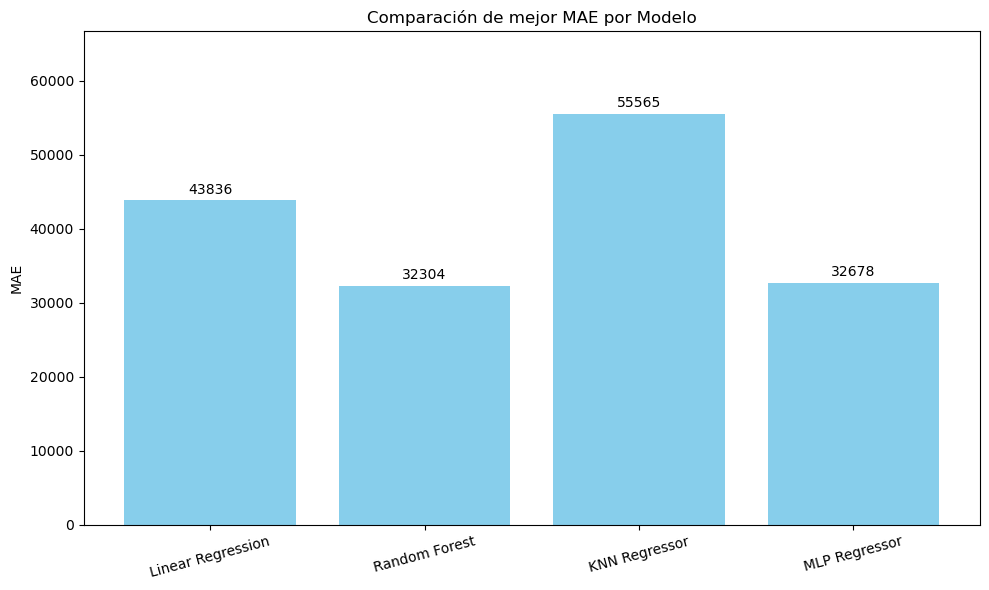

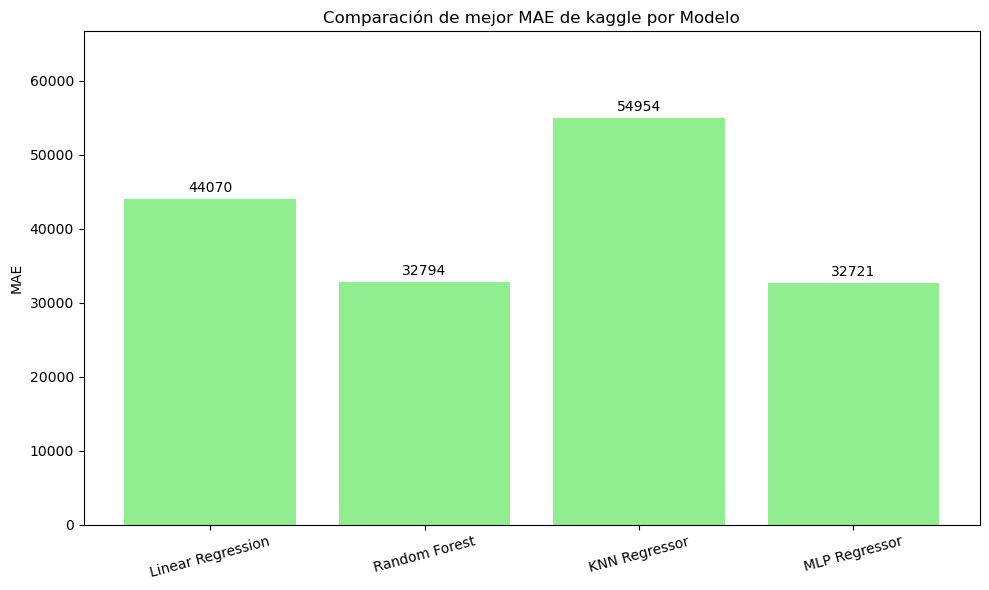

In [63]:
# Datos
modelos = ['Linear Regression', 'Random Forest', 'KNN Regressor', 'MLP Regressor']
mae = [43835.58, 32304.40, 55564.73, 32677.80]
kaggle = [44070.067, 32794.316, 54954.093, 32721.310]

# Crear DataFrame
df = pd.DataFrame({'Modelo': modelos, 'MAE': mae, 'Kaggle':kaggle})

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Modelo'], df['MAE'], color='skyblue')
plt.title('Comparación de mejor MAE por Modelo')
plt.ylabel('MAE')
plt.xticks(rotation=15)
limite_superior = max(mae) * 1.2
plt.ylim(0, limite_superior)

# Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Modelo'], df['Kaggle'], color='lightgreen')
plt.title('Comparación de mejor MAE de kaggle por Modelo')
plt.ylabel('MAE')
plt.xticks(rotation=15)
limite_superior = max(mae) * 1.2
plt.ylim(0, limite_superior)

# Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Como se puede ver, el MAE interno y el de kaggle producen resultados muy similares: random forest y MLP son los modelos que obtienen mejores resultados y KNN tiene un rendimiento muy bajo. Sin embargo, los ensembles combinan las predicciones de múltiples modelos, que pueden tener rendimientos pobres individualmente, para mejorar la precisión y robustez, por lo que en la siguiente sección se seguirán incluyendo estos modelos debido a que pueden mejorar el rendimiento general aportando diversidad

### Ensembles

Con el objetivo de mejorar el rendimiento de los modelos individuales, se exploraron técnicas de ensemble, que permiten combinar múltiples modelos para obtener predicciones más robustas y precisas.

En este trabajo se emplearon dos enfoques principales:
- Por un lado, se utilizaron modelos basados en boosting, como Gradient Boosting, XGBoost, LightGBM y CatBoost, que construyen modelos de forma secuencial corrigiendo errores progresivamente.
- Por otro lado, se aplicó la técnica de stacking, donde las predicciones de varios modelos base se utilizan como entrada de un metamodelo. Esta estrategia permitió aprovechar la diversidad de modelos entrenados (KNN, Random Forest, modelos de boosting, etc.) para obtener una combinación óptima de sus predicciones.

Estas técnicas permitieron reducir el MAE respecto a los modelos individuales, siendo el stacking con un metamodelo MLPRegressor la solución final seleccionada.

#### Entrenamiento base

Para construir las primeras versiones del sistema ensemble, se preparó un conjunto de modelos base representativos y diversos. Estos incluyeron tanto algoritmos clásicos (como KNeighborsRegressor o Ridge) como modelos más complejos basados en árboles (RandomForest, HistGradientBoosting) y redes neuronales (MLPRegressor). El objetivo era que el conjunto cubriese distintos tipos de relaciones y escalas presentes en los datos.

El primer metamodelo utilizado fue una regresión lineal (LinearRegression), que combinaba las predicciones de los modelos base sin boosting. También se probó una arquitectura de stacking más sofisticada, utilizando un MLPRegressor como metamodelo. Esta estructura logró mejorar el rendimiento, alcanzando un MAE de 28889.4232 en su mejor versión inicial.

In [ ]:
# MAE metamodelo: 28889.4232

#  1. Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')

#  2. Guardar y separar target 
target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

#  3. Codificar variables categóricas 
# Label Encoding para eficiencia_enerxetica
le = LabelEncoder()
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

# One-Hot Encoding para el resto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

#  4. Rellenar NaNs con mediana 
X = X.fillna(X.median(numeric_only=True))

#X_train es para entrenar a los modelos iniciales
#X_temp se pasa al segundo split
#X_meta es de donde sacamos las predicciones para el metamodelo
#X_test es X_test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

#  6. Normalizar 
#  6.1 Primero setear el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

########################################################################################
########################################################################################

#Indicamos cuales van a ser los modelos iniciales a entrenar
modelos_iniciales= [
    KNeighborsRegressor(n_neighbors=5),
    RandomForestRegressor(n_estimators=100, random_state=42),
    MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16),activation='relu',solver='adam',alpha=0.01,learning_rate_init=0.002,max_iter=3000,early_stopping=True,n_iter_no_change=20,tol=1e-4,validation_fraction=0.25,random_state=42),
    Ridge(alpha=1.0),
    HistGradientBoostingRegressor(max_iter=200, random_state=42),
    #HASTA AQUI 29536.1468

    CatBoostRegressor(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        loss_function='MAE',
        random_seed=42,
        verbose=0,
        od_type='Iter',
        od_wait=30),
    LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,  
        reg_lambda=1.0,
        objective='reg:squarederror',
        random_state=42
    )
]

#Indicamos cual va a ser el metamodelo a usar
#metamodelo=LinearRegression()
metamodelo= MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu',solver='adam', max_iter=2000, early_stopping=True,random_state=42)

X_meta_train = np.zeros((len(X_train_scaled), len(modelos_iniciales)))
X_meta_test = np.zeros((len(X_test_scaled), len(modelos_iniciales)))

splits=5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)
modelos_entrenados_finales = []  # Para guardar modelos entrenados finales

for modelo_idx, modelo in enumerate(tqdm(modelos_iniciales, desc="Entrenando modelos...")):
    nombremodel = modelo.__class__.__name__
    tqdm.write(f"Entrenando: {nombremodel}")
    
    predicciones_ext = [None] * len(X_train_scaled)
    predicciones_int = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_int, y_train_int = X_train_scaled[train_idx], y_train_full.iloc[train_idx]
        X_val = X_train_scaled[val_idx]

        modelo_cv = clone(modelo)
        modelo_cv.fit(X_train_int, y_train_int)

        preds_val = modelo_cv.predict(X_val)
        for idx, pred in zip(val_idx, preds_val):
            predicciones_ext[idx] = pred

        predicciones_int.append(modelo_cv.predict(X_test_scaled))

    for i, pred in enumerate(predicciones_ext):
        X_meta_train[i, modelo_idx] = pred

    avg_test_preds = np.mean(predicciones_int, axis=0)
    for i, pred in enumerate(avg_test_preds):
        X_meta_test[i, modelo_idx] = pred

    modelo_entrenado = clone(modelo)
    modelo_entrenado.fit(X_train_scaled, y_train_full)
    modelos_entrenados_finales.append(modelo_entrenado)


metamodelo.fit(X_meta_train, y_train_full)
y_pred_provisional = metamodelo.predict(X_meta_test)

mae_metamodelo = mean_absolute_error(y_test, y_pred_provisional)
print(f"\n\nMAE metamodelo: {mae_metamodelo:.4f}")


#  9. Cargar test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#  10. Codificar igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train_full.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train_full.median(numeric_only=True))

#  11. Normalizar 
X_test_final = scaler.transform(df_test)

predicciones_reales=[]
for modelo in modelos_entrenados_finales:
    predicciones_reales.append(modelo.predict(X_test_final))

stack_predicciones=np.column_stack(predicciones_reales)

#  12. Predecir 
y_pred_final = metamodelo.predict(stack_predicciones)

#  13. Guardar resultados 
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
print('PREDICCIONES GENERADAS')
resultados.to_csv('predicciones_stacking5.csv', index=False)

Entrenando modelos...:   0%|          | 0/8 [00:00<?, ?it/s]

Entrenando: KNeighborsRegressor


Entrenando modelos...:  12%|█▎        | 1/8 [00:00<00:03,  2.15it/s]

Entrenando: RandomForestRegressor


Entrenando modelos...:  25%|██▌       | 2/8 [01:42<05:59, 59.99s/it]

Entrenando: MLPRegressor


Entrenando modelos...:  38%|███▊      | 3/8 [04:38<09:25, 113.07s/it]

Entrenando: Ridge
Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  62%|██████▎   | 5/8 [04:40<02:29, 49.78s/it] 

Entrenando: CatBoostRegressor


Entrenando modelos...:  75%|███████▌  | 6/8 [04:58<01:21, 40.58s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 223160.343594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 223138.817656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 224165.352500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Entrenando modelos...:  88%|████████▊ | 7/8 [05:03<00:30, 30.16s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Entrenando modelos...: 100%|██████████| 8/8 [05:10<00:00, 38.76s/it]




MAE metamodelo: 28889.4232
PREDICCIONES GENERADAS


c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#### ENTRENANDO CON EL DATASET DE TRAIN COMPLETO ###

#  1. Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')

#  2. Guardar y separar target 
target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

#  3. Codificar variables categóricas 
# Label Encoding para eficiencia_enerxetica
le = LabelEncoder()
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

# One-Hot Encoding para el resto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

#  4. Rellenar NaNs con mediana 
X = X.fillna(X.median(numeric_only=True))

#X_train es para entrenar a los modelos iniciales
#X_temp se pasa al segundo split
#X_meta es de donde sacamos las predicciones para el metamodelo
#X_test es X_test
#X_train_full, X_test, y_train_full, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
X_train_full = X.copy()
y_train_full = target.copy()

#  6. Normalizar 
#  6.1 Primero setear el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_train_full)
#X_test_scaled = scaler.transform(X_test)

########################################################################################
########################################################################################

#Indicamos cuales van a ser los modelos iniciales a entrenar
modelos_iniciales= [
    KNeighborsRegressor(n_neighbors=5),
    RandomForestRegressor(n_estimators=100, random_state=42),
    MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16),activation='relu',solver='adam',alpha=0.01,learning_rate_init=0.002,max_iter=3000,early_stopping=True,n_iter_no_change=20,tol=1e-4,validation_fraction=0.25,random_state=42),
    Ridge(alpha=1.0),
    HistGradientBoostingRegressor(max_iter=200, random_state=42),

    CatBoostRegressor(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        loss_function='MAE',
        random_seed=42,
        verbose=0,
        od_type='Iter',
        od_wait=30),
    LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,  
        reg_lambda=1.0,
        objective='reg:squarederror',
        random_state=42
    )
]

#Indicamos cual va a ser el metamodelo a usar
#metamodelo=LinearRegression()
metamodelo= MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu',solver='adam', max_iter=2000, early_stopping=True,random_state=42)

X_meta_train = np.zeros((len(X_train_scaled), len(modelos_iniciales)))
X_meta_test = np.zeros((len(X_test_scaled), len(modelos_iniciales)))

splits=5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)
modelos_entrenados_finales = []  # Para guardar modelos entrenados finales

for modelo_idx, modelo in enumerate(tqdm(modelos_iniciales, desc="Entrenando modelos...")):
    nombremodel = modelo.__class__.__name__
    tqdm.write(f"Entrenando: {nombremodel}")
    
    predicciones_ext = [None] * len(X_train_scaled)
    predicciones_int = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_int, y_train_int = X_train_scaled[train_idx], y_train_full.iloc[train_idx]
        X_val = X_train_scaled[val_idx]

        modelo_cv = clone(modelo)
        modelo_cv.fit(X_train_int, y_train_int)

        preds_val = modelo_cv.predict(X_val)
        for idx, pred in zip(val_idx, preds_val):
            predicciones_ext[idx] = pred

        predicciones_int.append(modelo_cv.predict(X_test_scaled))

    for i, pred in enumerate(predicciones_ext):
        X_meta_train[i, modelo_idx] = pred

    avg_test_preds = np.mean(predicciones_int, axis=0)
    for i, pred in enumerate(avg_test_preds):
        X_meta_test[i, modelo_idx] = pred

    modelo_entrenado = clone(modelo)
    modelo_entrenado.fit(X_train_scaled, y_train_full)
    modelos_entrenados_finales.append(modelo_entrenado)


metamodelo.fit(X_meta_train, y_train_full)
y_pred_provisional = metamodelo.predict(X_meta_test)


#  9. Cargar test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#  10. Codificar igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train_full.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train_full.median(numeric_only=True))

#  11. Normalizar 
X_test_final = scaler.transform(df_test)

predicciones_reales=[]
for modelo in modelos_entrenados_finales:
    predicciones_reales.append(modelo.predict(X_test_final))

stack_predicciones=np.column_stack(predicciones_reales)

#  12. Predecir 
y_pred_final = metamodelo.predict(stack_predicciones)

#  13. Guardar resultados 
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
print('PREDICCIONES GENERADAS')
resultados.to_csv('predicciones_stacking7.csv', index=False)


Entrenando modelos...:   0%|          | 0/8 [00:00<?, ?it/s]

Entrenando: KNeighborsRegressor


c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
Entrenando modelos...:  12%|█▎        | 1/8 [00:02<00:20,  2.98s/it]

Entrenando: RandomForestRegressor


Entrenando modelos...:  25%|██▌       | 2/8 [02:47<09:49, 98.17s/it]

Entrenando: MLPRegressor


Entrenando modelos...:  50%|█████     | 4/8 [05:22<05:00, 75.14s/it] 

Entrenando: Ridge
Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  62%|██████▎   | 5/8 [05:27<02:29, 49.69s/it]

Entrenando: CatBoostRegressor


Entrenando modelos...:  75%|███████▌  | 6/8 [06:06<01:31, 46.00s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223357.201938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 224090.286750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223507.724500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 222384.794438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223674.064875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 32
[LightGBM] [Info] Start training from score 223402.814500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Entrenando modelos...:  88%|████████▊ | 7/8 [06:18<00:34, 34.86s/it]

Entrenando: XGBRegressor


Entrenando modelos...: 100%|██████████| 8/8 [06:34<00:00, 49.35s/it]
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


PREDICCIONES GENERADAS


##### Optimización de hiperparámetros

Para algunos modelos se aplicó una búsqueda de hiperparámetros con el objetivo de mejorar su rendimiento. En función del modelo, se utilizaron estrategias como ajuste manual o GridSearchCV. Esta optimización permitió reducir el MAE en varios casos, como por ejemplo en Random Forest o HistGradientBoosting. Los mejores parámetros obtenidos se utilizaron en los modelos base del ensemble final.

In [ ]:
### OPTIMIZAR HIPRARAMETROS DE XGBRegressor

param_grid = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.5, 1.0, 2.0]
}

model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
search_xgb = RandomizedSearchCV(model_xgb, param_distributions=param_grid, 
                                 n_iter=15, scoring='neg_mean_absolute_error',
                                 cv=3, verbose=1, random_state=42, n_jobs=-1)

search_xgb.fit(X_train_scaled, y_train_full)
best_xgb = search_xgb.best_estimator_
print("Mejor XGB:", search_xgb.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Mejor XGB: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
# OPTIMIZAR HIPERPARAMETROS DE LGBMRegressor

param_grid = {
    'iterations': [500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7]
}

model_cat = CatBoostRegressor(loss_function='MAE', verbose=0, random_seed=42)
search_cat = RandomizedSearchCV(model_cat, param_distributions=param_grid,
                                n_iter=15, scoring='neg_mean_absolute_error',
                                cv=3, verbose=1, random_state=42, n_jobs=-1)

search_cat.fit(X_train_scaled, y_train_full)
best_cat = search_cat.best_estimator_
print("Mejor CatBoost:", search_cat.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Mejor CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 6}


In [ ]:
# OPTIMIZAR HIPERPARAMETROS DE LGBMRegressor

param_grid = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8, -1],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

model_lgbm = LGBMRegressor(random_state=42)
search_lgbm = RandomizedSearchCV(
    model_lgbm,
    param_distributions=param_grid,
    n_iter=15,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_lgbm.fit(X_train_scaled, y_train_full)
best_lgbm = search_lgbm.best_estimator_
print("Mejor LGBM:", search_lgbm.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 32
[LightGBM] [Info] Start training from score 223402.814500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# OPTIMIZAR HIPERPARAMETROS DE KNeighborsRegressor

# Definir espacio de parámetros para KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': np.arange(1, 20),  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrica de distancia
}

knn_model = KNeighborsRegressor()

# Realizar búsqueda aleatoria
search_knn = RandomizedSearchCV(
    knn_model,
    param_distributions=param_grid_knn,
    n_iter=10,  # Número de combinaciones aleatorias
    scoring='neg_mean_absolute_error',  # Evaluar con MAE negativo
    cv=3,  # Validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_knn.fit(X_train_scaled, y_train_full)
best_knn = search_knn.best_estimator_
print("Mejor KNN:", search_knn.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor KNN: {'weights': 'distance', 'n_neighbors': np.int64(16), 'metric': 'manhattan'}


In [82]:
# OPTIMIZAR HIPERPARAMETROS DE RandomForestRegressor

# Definir espacio de parámetros para RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'bootstrap': [True, False],  # Usar bootstrap
}

rf_model = RandomForestRegressor(random_state=42)

# Realizar búsqueda aleatoria
search_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid_rf,
    n_iter=10,  # Número de combinaciones aleatorias
    scoring='neg_mean_absolute_error',  # Evaluar con MAE negativo
    cv=3,  # Validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_rf.fit(X_train_scaled, y_train_full)
best_rf = search_rf.best_estimator_
print("Mejor RandomForest:", search_rf.best_params_)


NameError: name 'y_train_full' is not defined

In [ ]:
# OPTIMIZAR HIPERPARAMETROS DE HistGradientBoostingRegressor

# Definir espacio de parámetros para HistGradientBoostingRegressor
param_grid_hgb = {
    'max_iter': [100, 200, 300],  # Número de iteraciones
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5, 10, None],  # Profundidad máxima de los árboles
    'min_samples_leaf': [20, 50, 100],  # Mínimo número de muestras en una hoja
    'l2_regularization': [0, 0.1, 0.5],  # Regularización L2
}

hgb_model = HistGradientBoostingRegressor(random_state=42)

# Realizar búsqueda aleatoria
search_hgb = RandomizedSearchCV(
    hgb_model,
    param_distributions=param_grid_hgb,
    n_iter=10,  # Número de combinaciones aleatorias
    scoring='neg_mean_absolute_error',  # Evaluar con MAE negativo
    cv=3,  # Validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_hgb.fit(X_train_scaled, y_train_full)
best_hgb = search_hgb.best_estimator_
print("Mejor HistGradientBoosting:", search_hgb.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor HistGradientBoosting: {'min_samples_leaf': 50, 'max_iter': 300, 'max_depth': 5, 'learning_rate': 0.1, 'l2_regularization': 0.1}


In [ ]:
# Guardar los mejores modelos
best_knn = KNeighborsRegressor(
    weights='distance',
    n_neighbors=int(np.int64(16)),
    metric='manhattan'
)
best_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=20,
    bootstrap=True,random_state=42
)
best_hgb = HistGradientBoostingRegressor(
    min_samples_leaf=50,
    max_iter=300,
    max_depth=5,
    learning_rate=0.1,
    l2_regularization=0.1,random_state=42
)
best_cat = CatBoostRegressor(
    learning_rate=0.05,
    l2_leaf_reg=5,
    iterations=1000,
    depth=6,
    verbose=0,random_state=42
)
best_lgbm = LGBMRegressor(
    subsample=0.8,
    num_leaves=50,
    n_estimators=300,
    min_child_samples=30,
    max_depth=6,
    learning_rate=0.05,
    colsample_bytree=0.6,random_state=42
)
best_xgb = XGBRegressor(
    subsample=1.0,
    reg_lambda=1.0,
    reg_alpha=1.0,
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    colsample_bytree=0.8,random_state=42
)
best_mlp = MLPRegressor(
    solver='adam',
    max_iter=1000,
    learning_rate_init=0.01,
    hidden_layer_sizes=(64, 32),
    activation='relu',random_state=42
)

##### Stacking con modelos optimizados

Tras probar distintas combinaciones de modelos base e hiperparámetros, se construyó un stacking final con los mejores estimadores individuales (KNN, Random Forest, boosting, etc.) y un metamodelo MLPRegressor.

La primera prueba incluyó todos los modelos optimizados individualmente, pero resultó ser demasiado compleja y no mejoró lo esperado (MAE = 28784.8810). 

También se utilizó una versión con menos modelos base, sin mejora significativa (MAE = 28723.4725).

La mejor configuración se obtuvo al mantener un conjunto equilibrado de modelos y aumentar la profundidad del metamodelo (MLP con capas 128, 64, 32). Esta estrategia alcanzó el mejor MAE de 28447.4623, el mejor hasta el momento.

In [ ]:
## MAE metamodelo: 28447.4623

#Preprocesado (sacado del KNN)

#  1. Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')#

#  2. Guardar y separar target 
target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

#  3. Codificar variables categóricas 
# Label Encoding para eficiencia_enerxetica
le = LabelEncoder()
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

# One-Hot Encoding para el resto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

#  4. Rellenar NaNs con mediana 
X = X.fillna(X.median(numeric_only=True))

#X_train es para entrenar a los modelos iniciales
#X_temp se pasa al segundo split
#X_meta es de donde sacamos las predicciones para el metamodelo
#X_test es X_test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

#  6. Normalizar 
#  6.1 Primero setear el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

########################################################################################
########################################################################################

#Indicamos cuales van a ser los modelos iniciales a entrenar
modelos_iniciales = [
    best_knn,
    best_rf,
    best_hgb,
    best_cat,
    best_lgbm,
    best_xgb,

    ExtraTreesRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42),

    Ridge(
    alpha=1.0,
    solver='auto',
    random_state=42),
    
    SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1)
]
'''
    XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=42)'''

#Indicamos cual va a ser el metamodelo a usar
#con este y las iniciales sobre 29950
#metamodelo=LinearRegression()
metamodelo= MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',solver='adam', max_iter=3000, early_stopping=True,random_state=42)

X_meta_train = np.zeros((len(X_train_scaled), len(modelos_iniciales)))
X_meta_test = np.zeros((len(X_test_scaled), len(modelos_iniciales)))

splits=5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)
modelos_entrenados_finales = []  # Para guardar modelos entrenados finales

for modelo_idx, modelo in enumerate(tqdm(modelos_iniciales, desc="Entrenando modelos...")):
    nombremodel = modelo.__class__.__name__
    tqdm.write(f"Entrenando: {nombremodel}")
    
    predicciones_ext = [None] * len(X_train_scaled)
    predicciones_int = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_int, y_train_int = X_train_scaled[train_idx], y_train_full.iloc[train_idx]
        X_val = X_train_scaled[val_idx]

        modelo_cv = clone(modelo)
        modelo_cv.fit(X_train_int, y_train_int)

        preds_val = modelo_cv.predict(X_val)
        for idx, pred in zip(val_idx, preds_val):
            predicciones_ext[idx] = pred

        predicciones_int.append(modelo_cv.predict(X_test_scaled))

    for i, pred in enumerate(predicciones_ext):
        X_meta_train[i, modelo_idx] = pred

    avg_test_preds = np.mean(predicciones_int, axis=0)
    for i, pred in enumerate(avg_test_preds):
        X_meta_test[i, modelo_idx] = pred

    modelo_entrenado = clone(modelo)
    modelo_entrenado.fit(X_train_scaled, y_train_full)
    modelos_entrenados_finales.append(modelo_entrenado)


metamodelo.fit(X_meta_train, y_train_full)
y_pred_provisional = metamodelo.predict(X_meta_test)

mae_metamodelo = mean_absolute_error(y_test, y_pred_provisional)
print(f"\n\nMAE metamodelo: {mae_metamodelo:.4f}")


#  9. Cargar test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#  10. Codificar igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train_full.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train_full.median(numeric_only=True))

#  11. Normalizar 
X_test_final = scaler.transform(df_test)

predicciones_reales=[]
for modelo in modelos_entrenados_finales:
    predicciones_reales.append(modelo.predict(X_test_final))

stack_predicciones=np.column_stack(predicciones_reales)

#  12. Predecir 
y_pred_final = metamodelo.predict(stack_predicciones)

#  13. Guardar resultados 
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
print('PREDICCIONES GENERADAS')
resultados.to_csv('predicciones_stacking5.csv', index=False) # Este csv no sirve para nada

In [ ]:
#### Para subir a kaggle lo anterior###

#Preprocesado (sacado del KNN)

#  1. Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')

#  2. Guardar y separar target 
target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

#  3. Codificar variables categóricas 
# Label Encoding para eficiencia_enerxetica
le = LabelEncoder()
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

# One-Hot Encoding para el resto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

#  4. Rellenar NaNs con mediana 
X = X.fillna(X.median(numeric_only=True))

#X_train es para entrenar a los modelos iniciales
#X_temp se pasa al segundo split
#X_meta es de donde sacamos las predicciones para el metamodelo
#X_test es X_test
#X_train_full, X_test, y_train_full, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
X_train_full = X.copy()
y_train_full = target.copy()

#  6. Normalizar 
#  6.1 Primero setear el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_train_full)
#X_test_scaled = scaler.transform(X_test)

########################################################################################
########################################################################################

#Indicamos cuales van a ser los modelos iniciales a entrenar
modelos_iniciales = [
    best_knn,
    best_rf,
    best_hgb,
    best_cat, 
    best_lgbm, 
    best_xgb,

    ExtraTreesRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42),

    Ridge(
    alpha=1.0,
    solver='auto',
    random_state=42),
    
    SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1)
]

#Indicamos cual va a ser el metamodelo a usar
metamodelo= MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',solver='adam', max_iter=3000, early_stopping=True,random_state=42)

X_meta_train = np.zeros((len(X_train_scaled), len(modelos_iniciales)))
X_meta_test = np.zeros((len(X_test_scaled), len(modelos_iniciales)))

splits=5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)
modelos_entrenados_finales = []  # Para guardar modelos entrenados finales

for modelo_idx, modelo in enumerate(tqdm(modelos_iniciales, desc="Entrenando modelos...")):
    nombremodel = modelo.__class__.__name__
    tqdm.write(f"Entrenando: {nombremodel}")
    
    predicciones_ext = [None] * len(X_train_scaled)
    predicciones_int = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_int, y_train_int = X_train_scaled[train_idx], y_train_full.iloc[train_idx]
        X_val = X_train_scaled[val_idx]

        modelo_cv = clone(modelo)
        modelo_cv.fit(X_train_int, y_train_int)

        preds_val = modelo_cv.predict(X_val)
        for idx, pred in zip(val_idx, preds_val):
            predicciones_ext[idx] = pred

        predicciones_int.append(modelo_cv.predict(X_test_scaled))

    for i, pred in enumerate(predicciones_ext):
        X_meta_train[i, modelo_idx] = pred

    avg_test_preds = np.mean(predicciones_int, axis=0)
    for i, pred in enumerate(avg_test_preds):
        X_meta_test[i, modelo_idx] = pred

    modelo_entrenado = clone(modelo)
    modelo_entrenado.fit(X_train_scaled, y_train_full)
    modelos_entrenados_finales.append(modelo_entrenado)


metamodelo.fit(X_meta_train, y_train_full)
y_pred_provisional = metamodelo.predict(X_meta_test)

#  9. Cargar test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#  10. Codificar igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train_full.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train_full.median(numeric_only=True))

#  11. Normalizar 
X_test_final = scaler.transform(df_test)

predicciones_reales=[]
for modelo in modelos_entrenados_finales:
    predicciones_reales.append(modelo.predict(X_test_final))

stack_predicciones=np.column_stack(predicciones_reales)

#  12. Predecir 
y_pred_final = metamodelo.predict(stack_predicciones)

#  13. Guardar resultados 
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
print('PREDICCIONES GENERADAS')
resultados.to_csv('predicciones_stacking12.csv', index=False)


Entrenando modelos...:   0%|          | 0/17 [00:00<?, ?it/s]

Entrenando: KNeighborsRegressor


Entrenando modelos...:  11%|█         | 1/9 [00:10<01:20, 10.01s/it]

Entrenando: RandomForestRegressor


Entrenando modelos...:  22%|██▏       | 2/9 [02:50<11:27, 98.24s/it]

Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  33%|███▎      | 3/9 [02:54<05:32, 55.50s/it]

Entrenando: CatBoostRegressor


Entrenando modelos...:  44%|████▍     | 4/9 [03:21<03:41, 44.37s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223357.201938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 224090.286750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223507.724500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 222384.794438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223674.064875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 32
[LightGBM] [Info] Start training from score 223402.814500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Entrenando modelos...:  56%|█████▌    | 5/9 [03:27<02:01, 30.35s/it]

Entrenando: XGBRegressor


Entrenando modelos...:  67%|██████▋   | 6/9 [03:30<01:02, 20.96s/it]

Entrenando: ExtraTreesRegressor


Entrenando modelos...:  78%|███████▊  | 7/9 [04:20<01:01, 30.58s/it]

Entrenando: Ridge
Entrenando: SVR


Entrenando modelos...: 100%|██████████| 9/9 [07:14<00:00, 48.32s/it]
c:\Users\lucia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


PREDICCIONES GENERADAS


#### Mejor modelo

Finalmente, se exploró una estrategia basada en duplicar los modelos más competitivos, entrenándolos con diferentes configuraciones de hiperparámetros. Esta técnica permitió aprovechar la diversidad que se puede obtener incluso dentro del mismo tipo de modelo, mejorando la capacidad del ensemble para generalizar sobre nuevos datos. En total, se utilizaron 17 modelos base.

Esta configuración alcanzó el mejor MAE obtenido (28347.7175)

In [ ]:
# OTRA OPTIMIZACION DE HIPERPARAMETROS

# Definir espacio de parámetros para ExtraTreesRegressor
param_grid_et = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimos ejemplos para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimos ejemplos en la hoja
    'bootstrap': [True, False],  # Si se usa bootstrap para el muestreo
}

et_model = ExtraTreesRegressor(random_state=42)

# Realizar búsqueda aleatoria
search_et = RandomizedSearchCV(
    et_model,
    param_distributions=param_grid_et,
    n_iter=10,  # Número de combinaciones aleatorias
    scoring='neg_mean_absolute_error',  # Evaluar con MAE negativo
    cv=3,  # Validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_et.fit(X_train_scaled, y_train_full)
best_et = search_et.best_estimator_
print("Mejor ExtraTreesRegressor:", search_et.best_params_)

from sklearn.linear_model import Ridge

# Definir espacio de parámetros para Ridge
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularización L2
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],  # Método de solución
}

ridge_model = Ridge(random_state=42)

# Realizar búsqueda aleatoria
search_ridge = RandomizedSearchCV(
    ridge_model,
    param_distributions=param_grid_ridge,
    n_iter=10,  # Número de combinaciones aleatorias
    scoring='neg_mean_absolute_error',  # Evaluar con MAE negativo
    cv=3,  # Validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_ridge.fit(X_train_scaled, y_train_full)
best_ridge = search_ridge.best_estimator_
print("Mejor Ridge:", search_ridge.best_params_)

from sklearn.svm import SVR

# Definir espacio de parámetros para SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],  # Penalización de los errores
    'epsilon': [0.01, 0.1, 0.2, 0.5],  # Tolerancia para los márgenes
    'kernel': ['rbf', 'linear', 'poly'],  # Función del kernel
    'gamma': ['scale', 'auto'],  # Parámetro de los kernels no lineales
}

svr_model = SVR()

# Realizar búsqueda aleatoria
search_svr = RandomizedSearchCV(
    svr_model,
    param_distributions=param_grid_svr,
    n_iter=10,  # Número de combinaciones aleatorias
    scoring='neg_mean_absolute_error',  # Evaluar con MAE negativo
    cv=3,  # Validación cruzada
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_svr.fit(X_train_scaled, y_train_full)
best_svr = search_svr.best_estimator_
print("Mejor SVR:", search_svr.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor ExtraTreesRegressor: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor Ridge: {'solver': 'auto', 'alpha': 0.1}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor SVR: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.01, 'C': 100}


In [44]:
best_et = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=False,
    random_state=42
)

best_ridge = Ridge(alpha=0.1, solver='auto', random_state=42)

best_svr = SVR(kernel='linear', gamma='scale', epsilon=0.01, C=100)


In [18]:
## BESTMODELS
best_knn2 = KNeighborsRegressor(
    weights='distance',
    n_neighbors=int(np.int64(16)),
    metric='manhattan'
)
best_rf2 = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=20,
    bootstrap=True,random_state=15
)
best_hgb2 = HistGradientBoostingRegressor(
    min_samples_leaf=50,
    max_iter=300,
    max_depth=5,
    learning_rate=0.1,
    l2_regularization=0.1,random_state=15
)
best_cat2 = CatBoostRegressor(
    learning_rate=0.05,
    l2_leaf_reg=5,
    iterations=1000,
    depth=6,
    verbose=0,random_state=15
)
best_lgbm2 = LGBMRegressor(
    subsample=0.8,
    num_leaves=50,
    n_estimators=300,
    min_child_samples=30,
    max_depth=6,
    learning_rate=0.05,
    colsample_bytree=0.6,random_state=15
)
best_xgb2 = XGBRegressor(
    subsample=1.0,
    reg_lambda=1.0,
    reg_alpha=1.0,
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    colsample_bytree=0.8,random_state=15
)
best_mlp2 = MLPRegressor(
    solver='adam',
    max_iter=1000,
    learning_rate_init=0.01,
    hidden_layer_sizes=(64, 32),
    activation='relu',random_state=15
)
best_et2 = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=False,
    random_state=15
)

best_ridge2 = Ridge(alpha=0.1, solver='auto', random_state=15)



In [ ]:
# USAR DOS VECES LOS MEJORES MODELOS
#MAE metamodelo: 28347.7175

#  1. Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')#

#  2. Guardar y separar target 
target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

#  3. Codificar variables categóricas 
# Label Encoding para eficiencia_enerxetica
le = LabelEncoder()
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

# One-Hot Encoding para el resto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

#  4. Rellenar NaNs con mediana 
X = X.fillna(X.median(numeric_only=True))

#X_train es para entrenar a los modelos iniciales
#X_temp se pasa al segundo split
#X_meta es de donde sacamos las predicciones para el metamodelo
#X_test es X_test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

#  6. Normalizar 
#  6.1 Primero setear el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

########################################################################################
########################################################################################

#Indicamos cuales van a ser los modelos iniciales a entrenar
modelos_iniciales = [
    best_knn,
    best_rf,
    best_hgb,
    best_cat,
    best_lgbm,
    best_xgb,
    best_svr,
    best_et,
    best_ridge,

    best_knn2,
    best_rf2,
    best_hgb2,
    best_cat2,
    best_lgbm2,
    best_xgb2,
    best_et2,
    best_ridge2
]

#Indicamos cual va a ser el metamodelo a usar
metamodelo = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('mlp_deep', MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=3000, random_state=42)),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
        ('mlpo',MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',solver='adam', max_iter=3000, early_stopping=True,random_state=42))
    ],
    final_estimator=LinearRegression(),  # Meta-modelo final
    cv=5,  # Validación cruzada
    n_jobs=-1
)
X_meta_train = np.zeros((len(X_train_scaled), len(modelos_iniciales) + X_train_scaled.shape[1]))
X_meta_test = np.zeros((len(X_test_scaled), len(modelos_iniciales) + X_test_scaled.shape[1]))

splits=5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)
modelos_entrenados_finales = []  # Para guardar modelos entrenados finales

for modelo_idx, modelo in enumerate(tqdm(modelos_iniciales, desc="Entrenando modelos...")):
    nombremodel = modelo.__class__.__name__
    tqdm.write(f"Entrenando: {nombremodel}")
    
    predicciones_ext = [None] * len(X_train_scaled)
    predicciones_int = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_int, y_train_int = X_train_scaled[train_idx], y_train_full.iloc[train_idx]
        X_val = X_train_scaled[val_idx]

        modelo_cv = clone(modelo)
        modelo_cv.fit(X_train_int, y_train_int)

        preds_val = modelo_cv.predict(X_val)
        for idx, pred in zip(val_idx, preds_val):
            predicciones_ext[idx] = pred

        predicciones_int.append(modelo_cv.predict(X_test_scaled))

    for i, pred in enumerate(predicciones_ext):
        X_meta_train[i, modelo_idx] = pred

    avg_test_preds = np.mean(predicciones_int, axis=0)
    for i, pred in enumerate(avg_test_preds):
        X_meta_test[i, modelo_idx] = pred

    modelo_entrenado = clone(modelo)
    modelo_entrenado.fit(X_train_scaled, y_train_full)
    modelos_entrenados_finales.append(modelo_entrenado)

X_meta_train[:, len(modelos_iniciales):] = X_train_scaled
X_meta_test[:, len(modelos_iniciales):] = X_test_scaled

print("Entrenando el metamodelo...")
metamodelo.fit(X_meta_train, y_train_full)
y_pred_provisional = metamodelo.predict(X_meta_test)

mae_metamodelo = mean_absolute_error(y_test, y_pred_provisional)
print(f"\n\nMAE metamodelo: {mae_metamodelo:.4f}")

#  9. Cargar test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#  10. Codificar igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train_full.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train_full.median(numeric_only=True))

#  11. Normalizar 
X_test_final = scaler.transform(df_test)

predicciones_reales=[]
for modelo in modelos_entrenados_finales:
    predicciones_reales.append(modelo.predict(X_test_final))

stack_predicciones=np.column_stack(predicciones_reales)

#  12. Predecir 
y_pred_final = metamodelo.predict(np.hstack((stack_predicciones, X_test_final)))

#  13. Guardar resultados 
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
print('PREDICCIONES GENERADAS')
resultados.to_csv('predicciones_stacking5.csv', index=False) # Este csv no sirve para nada

Entrenando modelos...:   0%|          | 0/17 [00:00<?, ?it/s]

Entrenando: KNeighborsRegressor


Entrenando modelos...:   6%|▌         | 1/17 [00:01<00:17,  1.11s/it]

Entrenando: RandomForestRegressor


Entrenando modelos...:  12%|█▏        | 2/17 [01:52<16:25, 65.73s/it]

Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  18%|█▊        | 3/17 [01:54<08:32, 36.64s/it]

Entrenando: CatBoostRegressor


Entrenando modelos...:  24%|██▎       | 4/17 [02:11<06:16, 28.97s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 223160.343594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Entrenando modelos...:  29%|██▉       | 5/17 [02:13<03:49, 19.13s/it]

Entrenando: XGBRegressor


Entrenando modelos...:  35%|███▌      | 6/17 [02:14<02:22, 13.00s/it]

Entrenando: SVR


Entrenando modelos...:  41%|████      | 7/17 [02:34<02:35, 15.56s/it]

Entrenando: ExtraTreesRegressor


Entrenando modelos...:  47%|████▋     | 8/17 [02:59<02:46, 18.54s/it]

Entrenando: Ridge
Entrenando: KNeighborsRegressor


Entrenando modelos...:  59%|█████▉    | 10/17 [03:00<01:09,  9.98s/it]

Entrenando: RandomForestRegressor


Entrenando modelos...:  65%|██████▍   | 11/17 [04:51<03:33, 35.62s/it]

Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  71%|███████   | 12/17 [04:53<02:13, 26.66s/it]

Entrenando: CatBoostRegressor


Entrenando modelos...:  76%|███████▋  | 13/17 [05:11<01:36, 24.07s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 223160.343594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 222383.887187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Entrenando modelos...:  82%|████████▏ | 14/17 [05:12<00:53, 17.77s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Entrenando modelos...:  82%|████████▏ | 14/17 [05:12<00:53, 17.77s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 32
[LightGBM] [Info] Start training from score 223402.814500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Entrenando modelos...:  82%|████████▏ | 14/17 [06:53<01:07, 22.56s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Entrenando modelos...:  88%|████████▊ | 15/17 [05:13<00:25, 12.97s/it]

Entrenando: ExtraTreesRegressor


Entrenando modelos...: 100%|██████████| 17/17 [05:39<00:00, 19.96s/it]


Entrenando: Ridge
Entrenando el metamodelo...


MAE metamodelo: 28347.7175


c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 17 features, but LinearRegression is expecting 49 features as input.

In [ ]:
#### ENTRENANDO CON EL DATASET DE TRAIN COMPLETO ###

#Preprocesado (sacado del KNN)

#  1. Cargar dataset de entrenamiento 
df = pd.read_csv('./data/train.csv', delimiter=',')

#  2. Guardar y separar target 
target = df['prezo_euros']
X = df.drop(columns=['id', 'prezo_euros'])

#  3. Codificar variables categóricas 
# Label Encoding para eficiencia_enerxetica
le = LabelEncoder()
X['eficiencia_enerxetica'] = le.fit_transform(X['eficiencia_enerxetica'])

# One-Hot Encoding para el resto
X = pd.get_dummies(X, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

#  4. Rellenar NaNs con mediana 
X = X.fillna(X.median(numeric_only=True))

#X_train es para entrenar a los modelos iniciales
#X_temp se pasa al segundo split
#X_meta es de donde sacamos las predicciones para el metamodelo
#X_test es X_test
#X_train_full, X_test, y_train_full, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
X_train_full = X.copy()
y_train_full = target.copy()

#  6. Normalizar 
#  6.1 Primero setear el scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_train_full)
#X_test_scaled = scaler.transform(X_test)

########################################################################################
########################################################################################

#Indicamos cuales van a ser los modelos iniciales a entrenar
modelos_iniciales = [
     best_knn,
    best_rf,
    best_hgb,
    best_cat, 
    best_lgbm, 
    best_xgb,
    best_svr,
    best_et,
    best_ridge,
    best_knn2,
    best_rf2,
    best_hgb2,
    best_cat2,
    best_lgbm2,
    best_xgb2,
    best_et2,
    best_ridge2
]

#Indicamos cual va a ser el metamodelo a usar
metamodelo = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('mlp_deep', MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=3000, random_state=42)),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
        ('mlpo',MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',solver='adam', max_iter=3000, early_stopping=True,random_state=42))
    ],
    final_estimator=LinearRegression(),  # Meta-modelo final
    cv=5,  # Validación cruzada
    n_jobs=-1
)#SVR por probar

X_meta_train = np.zeros((len(X_train_scaled), len(modelos_iniciales) + X_train_scaled.shape[1]))
X_meta_test = np.zeros((len(X_test_scaled), len(modelos_iniciales) + X_test_scaled.shape[1]))

splits=5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)
modelos_entrenados_finales = []  # Para guardar modelos entrenados finales

for modelo_idx, modelo in enumerate(tqdm(modelos_iniciales, desc="Entrenando modelos...")):
    nombremodel = modelo.__class__.__name__
    tqdm.write(f"Entrenando: {nombremodel}")
    
    predicciones_ext = [None] * len(X_train_scaled)
    predicciones_int = []

    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_int, y_train_int = X_train_scaled[train_idx], y_train_full.iloc[train_idx]
        X_val = X_train_scaled[val_idx]

        modelo_cv = clone(modelo)
        modelo_cv.fit(X_train_int, y_train_int)

        preds_val = modelo_cv.predict(X_val)
        for idx, pred in zip(val_idx, preds_val):
            predicciones_ext[idx] = pred

        predicciones_int.append(modelo_cv.predict(X_test_scaled))

    for i, pred in enumerate(predicciones_ext):
        X_meta_train[i, modelo_idx] = pred

    avg_test_preds = np.mean(predicciones_int, axis=0)
    for i, pred in enumerate(avg_test_preds):
        X_meta_test[i, modelo_idx] = pred

    modelo_entrenado = clone(modelo)
    modelo_entrenado.fit(X_train_scaled, y_train_full)
    modelos_entrenados_finales.append(modelo_entrenado)

X_meta_train[:, len(modelos_iniciales):] = X_train_scaled
X_meta_test[:, len(modelos_iniciales):] = X_test_scaled

metamodelo.fit(X_meta_train, y_train_full)
y_pred_provisional = metamodelo.predict(X_meta_test)

#  9. Cargar test.csv 
df_test = pd.read_csv('./data/test.csv', delimiter=',')

# Guardar el ID
id_test = df_test['id']
df_test = df_test.drop(columns=['id'])

#  10. Codificar igual que en entrenamiento 
df_test['eficiencia_enerxetica'] = le.transform(df_test['eficiencia_enerxetica'])

df_test = pd.get_dummies(df_test, columns=[
    'tipo_edificacion',
    'calidade_materiais',
    'cor_favorita_propietario',
    'acceso_transporte_publico',
    'orientacion'
])

# Alinear columnas con X_train
df_test = df_test.reindex(columns=X_train_full.columns, fill_value=0)

# Rellenar NaNs
df_test = df_test.fillna(X_train_full.median(numeric_only=True))

#  11. Normalizar 
X_test_final = scaler.transform(df_test)

predicciones_reales=[]
for modelo in modelos_entrenados_finales:
    predicciones_reales.append(modelo.predict(X_test_final))

stack_predicciones=np.column_stack(predicciones_reales)

#  12. Predecir 
y_pred_final = metamodelo.predict(np.hstack((stack_predicciones, X_test_final)))

#  13. Guardar resultados 
resultados = pd.DataFrame({
    'id': id_test,
    'prezo_euros': y_pred_final
})
print('PREDICCIONES GENERADAS')
resultados.to_csv('predicciones_blending_doble.csv', index=False)


Entrenando modelos...:   0%|          | 0/17 [00:00<?, ?it/s]

Entrenando: KNeighborsRegressor


Entrenando modelos...:   6%|▌         | 1/17 [00:03<00:59,  3.69s/it]

Entrenando: RandomForestRegressor


Entrenando modelos...:  12%|█▏        | 2/17 [02:25<21:14, 84.94s/it]

Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  18%|█▊        | 3/17 [02:27<11:01, 47.24s/it]

Entrenando: CatBoostRegressor


Entrenando modelos...:  24%|██▎       | 4/17 [02:46<07:45, 35.78s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223357.201938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223507.724500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 223138.817656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 32
[LightGBM] [Info] Start training from score 223402.814500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Entrenando modelos...:  29%|██▉       | 5/17 [02:48<04:43, 23.64s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 32
[LightGBM] [Info] Start training from score 222383.887187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Entrenando modelos...:  35%|███▌      | 6/17 [02:49<02:56, 16.03s/it]

Entrenando: SVR


Entrenando modelos...:  41%|████      | 7/17 [03:32<04:07, 24.72s/it]

Entrenando: ExtraTreesRegressor


Entrenando modelos...:  47%|████▋     | 8/17 [04:04<04:05, 27.28s/it]

Entrenando: Ridge
Entrenando: KNeighborsRegressor


Entrenando modelos...:  59%|█████▉    | 10/17 [04:08<01:46, 15.16s/it]

Entrenando: RandomForestRegressor


Entrenando modelos...:  65%|██████▍   | 11/17 [06:30<04:44, 47.43s/it]

Entrenando: HistGradientBoostingRegressor


Entrenando modelos...:  71%|███████   | 12/17 [06:32<02:56, 35.38s/it]

Entrenando: CatBoostRegressor


Entrenando modelos...:  76%|███████▋  | 13/17 [06:51<02:02, 30.63s/it]

Entrenando: LGBMRegressor
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223357.201938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223507.724500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 223357.201938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 32
[LightGBM] [Info] Start training from score 223402.814500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Entrenando modelos...:  82%|████████▏ | 14/17 [06:53<01:07, 22.56s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Entrenando modelos...:  88%|████████▊ | 15/17 [06:54<00:32, 16.42s/it]

Entrenando: ExtraTreesRegressor


Entrenando modelos...: 100%|██████████| 17/17 [07:27<00:00, 26.30s/it]


Entrenando: Ridge


c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Anxo\Documents\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


PREDICCIONES GENERADAS


## Resultados

## Conclusión 